<a href="https://colab.research.google.com/github/aksevenli/Pytorch-Reinforcement-Learning/blob/master/randomSearchPolicyCartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing and evaluating a random search policy

A simple, yet effective, approach is to map an observation to a vector of two numbers representing two actions. **The action with the higher value will be picked**. The linear mapping is depicted by a weight matrix whose size is 4 x 2 since the observations are 4-dimensional in this case. **In each episode, the weight is randomly generated and is used to compute the action for every step in this episode**. The total reward is then calculated. This process repeats for many episodes and, in the end, **the weight that enables the highest total reward will become the learned policy**. This approach is called *random search* because the weight is randomly picked in each trial with the hope that the best weight will be found with a large number of trials.

CartPole is a traditional reinforcement learning task in which a pole is placed upright on top of a cart. The agent moves the cart either to the left or to the right by 1 unit in a timestep. **The goal is to balance the pole and prevent it from falling over**. The pole is considered to have fallen if it is more than 12 degrees from the vertical, or the cart moves 2.4 units away from the origin. An episode terminates when any of the following occurs:


1.   The pole falls over
2.   The number of timesteps reaches 200



In [0]:
import gym
import torch
import matplotlib.pyplot as plt

In [0]:
env = gym.make('CartPole-v0')

# obtain the dimensions of the observation and action space, used for defining tensor which is size 4 x 2
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

# Define a function that simulates an episode given the input weight and returns the total reward
def run_episode(env, weight):
  state = env.reset()
  total_reward = 0
  is_done = False
  while not is_done:
    state = torch.from_numpy(state).float() # convert state array to a tensor of the floate type for multiplication of the state and weight
    action = torch.argmax(torch.matmul(state, weight))
    state, reward, is_done, _ = env.step(action.item()) # take the value of the resulting action tensor using .item() because it is a one-element tensor
    total_reward += reward
  return total_reward

# Specify the number of episodes
n_episode = 1000

# Track the best toal reward on the fly, as well as the corresponding weight
best_total_reward = 0
best_weight = None
# Record the total reward for every episode
total_rewards = []

Run n_episode. For each episode do the following:


1.   Randomly pick the weight
2.   Let the agent take actions according to the linear mapping
3.   An episode terminates and returns the total reward
4.   Update the best total reward and the best weight if necessary
5.   Also, keep a record of the total reward





In [0]:
for episode in range(n_episode):
  weight = torch.rand(n_state, n_action)
  total_reward = run_episode(env, weight)
  print('Episode {}: {}'.format(episode+1, total_reward))
  if total_reward > best_total_reward:
    best_weight = weight
    best_total_reward = total_reward
  total_rewards.append(total_reward)
  

In [14]:
print('Average total reward over {} episode: {}'.format(n_episode, sum(total_rewards) / n_episode))

Average total reward over 1000 episode: 48.407


See how the learned policy performs on 100 new episodes

In [0]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
  total_reward = run_episode(env, best_weight)
  print('Episode {}: {}'.format(episode+1, total_reward))
  total_rewards_eval.append(total_reward)

In [16]:
print('Average total reward over {} episode: {}'.format(n_episode, sum(total_rewards_eval) / n_episode_eval))

Average total reward over 1000 episode: 134.18


Plot the total reward for every episode in the training phase

<function matplotlib.pyplot.show>

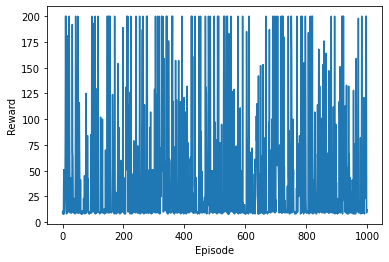

In [18]:
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show

In the plot of reward versus episodes, we can see that there are some episodes in which the reward reaches 200. We can end the training phase whenever this occurs since **there is no room to improve**. Incorporating this change, we now have the following for the training phase:

In [20]:
n_episode = 1000
best_total_reward = 0
best_weight = None
total_rewards = []
for episode in range(n_episode):
  weight = torch.rand(n_state, n_action)
  total_reward = run_episode(env, weight)
  print('Episode {}: {}'.format(episode+1, total_reward))
  if total_reward > best_total_reward:
    best_weight = weight
    best_total_reward = total_reward
  total_rewards.append(total_reward)
  if best_total_reward == 200:
    break

Episode 1: 76.0
Episode 2: 46.0
Episode 3: 200.0


In [21]:
n_training = 1000
n_episode_training = []
for _ in range(n_training):
  for episode in range(n_episode):
    weight = torch.rand(n_state, n_action)
    total_reward = run_episode(env, weight)
    if total_reward == 200:
      n_episode_training.append(episode+1)
      break

print('Expectation of training episodes needed: ', sum(n_episode_training) / n_training)

Expectation of training episodes needed:  14.477
